In [11]:
# %pip install -U --quiet  langgraph langchain_openai
# %pip install -U --quiet tavily-python
# %pip install -qU langchain-text-splitters
# %pip install -qU langchain-community

In [12]:
overall_prompt = """You are a AI assistant with a background in drug discovery.

    Given target: Gamma secretase
    Given disease: Alzheimer's disease
    Given mode of action: Gamma secretase is a multi-subunit protease complex that cleaves type I transmembrane proteins, including the amyloid precursor protein (APP) leading to the generation of amyloid-beta (Aβ) peptides.

    Context:
     Aβ is a family of secreted peptides generated from the sequential cleavages of the type 1 membrane protein APP by beta-secretase (BACE) and gamma-secretase (GSEC), respectively. 
     BACE cleaves APP in the luminal domain, releasing the N-terminal soluble APPβ domain and leaving the C-terminal fragment, APP-CTF, which remains in the membrane. 
     Subsequently, the APP-CTF is recruited to GSEC, a complex comprising four subunits, including PS, which harbors the active site. 
     GSEC first cuts APP-CTF at the epsilon-cleavage site located close to the inner leaflet of the membrane. This cleavage event produces either Aβ48 or Aβ49 and the APP intracellular domain (AICD).
    The membrane-retained Aβ48 or Aβ49 is then further processed by GSEC in a continuous cascade of proteolytical events at every third of fourth amino acid, where the N-terminal product of each reaction becomes the substrate for the next GSEC cleavage event. 
    Accordingly, GSEC processes APP-CTF along two main product lines, Aβ49 → 46 → 43 → 40 → 37… and Aβ48 → 45 → 42 → 38…, respectively. During this processing cascade, Aβ43 and shorter Aβ peptides stochastically escape further processing by GSEC and are released into the extracellular space. As a result, Aβ peptides varying from 30 to 43 amino acids in length are secreted into the extracellular space. Among all secreted Aβ, Aβ40 is the most abundant in human CSF, followed by Aβ38, Aβ42, and Aβ37 (Liu et al., 2022). In cognitively normal individuals, Aβ42 and Aβ43 represent a smaller portion of the total secreted Aβ (Liu et al., 2022). These longer forms of Aβ seed the formation of Aβ-amyloid aggregates, a key step in the formation of amyloid plaques (Veugelen et al., 2016), as illustrated in Figure 1. Aβ42, which is produced in higher amounts than Aβ43, is the most abundant Aβ in amyloid plaques (Welander et al., 2009).


    Task 1: Develop a scientific rationale for Gamma secretase in Alzheimer's disease.

    Highlight the working hypothesis for the clinical target rationale and human biology evidence by minimum 2000 words.

    Describe as much as possible the evidence in humans or in human tissue that link the target, target space or approach to the pathogenesis of interest.
    If known, also describe here the wanted mode of action with regards to desired clinical outcome.
    Please avoid including only pre-clinical data in this section.

    Use the following structure and provide a detailed description for each point:
    - Working hypothesis:
    - Create a detailed description of the following idea: Develop an inhibitor of the neurokinin 3 receptor (NK3R) GPCR for the treatment of vasomotor symptoms due to menopause.
    - Is there are significant unmet medical need?
    - Is it suitable for combination therapy?
    - Which predictive biomarkers exist for the target related to the disease?
        - Provide a detailed description of existing clinical relevant biomarkers.

    - Clinical target rationale:
    - How relevant is the target location to the disease biology?
    - How it the target expression altered in human disease?
    - How is the target involved in the physiological process relevant to the disease?
    - Which phenotypes and genotypes were identified for the target?
    - How is the genetic link between the target and the disease?
    - Describe the evidence provided in clinics or by tools acting on the pathway where the target is involved.
    - Which kind of target modulation is required to treat the disease?

    - Challenges for the drug discovery program related to the target.
    - Check the following idea for details on small molecule compounds: Develop an inhibitor of the neurokinin 3 receptor (NK3R) GPCR for the treatment of vasomotor symptoms due to menopause..
    - Is a 'information driven approach' (IDA) strategy based on available small molecules possible?
        - Which small molecular modulators of the target known?
        - Which inhibitors, antagonists, agonists, negative allosteric modulators (NAM), positive allosteric modulators (PAM) are required for target modulation in the given disease? 
    - Which patients would respond the therapy?
    - Is the proposed mode of action on the target desirable and commercially viable in a clinical setting?
    - What are advantages and disadvantages of different therapeutic modalities (antibodies, small molecules, antisense oligonucleotides, PROTACs, molecular glue, peptide macrocycles, and so on) for tackling the target?

    - Alternative indications:
    - Describe alternative indication for modulators of the target and explain why.

    Task 2: Develop a target assessment strategy for Gamma secretase in Alzheimer's disease in maximal 500 words.

    Outline a 1-year Target Assessment (TA) to Lead Identification (LI) plan. Describe High Level TA-LI plans.
    - Make an emphasis on key inflection points that will inform the feasibility of the project. 
    - Address status of in-vitro platforms, translational in vivo models (mechanistic models, not necessarily so called 'disease models')
    and describe what needs to be established. Elaborate on tractability and major challenges for advancement in a drug discovery portfolio.
    - Discuss potential biomarkers and readouts for efficacy and target engagement.

    Task 3: Safety assessment
    - Does the target show bias towards expression in the desired organ (e.g. CNS)?
    - Is it specifically expressed in the organ (e.g. brain)?
    - Are there disease specific expression databases?
    - Are there tissue-selective isoforms of the target?
    - Are there condition-specific isoforms of the target?
    - What regulates the alternative splicing that makes one isoform versus the other?
    - How large is the expression of the target in the mouse model intended for in vivo tests?
    - Is major phenotype reported in target knockouts and/or expression of rodent models?
    - Are there published differences in expression between human and rodent models.
    - What are the species differences that could be used to interpret rodent safety data on the target?
    - What are the peripherial safety risks (oncogensis)?
    - Can the modulation of the target promote tumor formation?
    - Is there a way to assess on-target safety concerns?
    - What are the safety concerns in case of exaggerated pharmacology?
    - Will it disrupt cellular functions (e.g. endosomes, lysosomes, nuclear, mitochondrial) function with all its safety liability?
    - How large is the risk for immunogenicity (related to biologics/antibody based approaches)?
    - If the target is an enzyme, do polymorphisms in the human gene alter the protein enzyme activity?

    Provide the corresponding literature references in the format (First author, Journal, Year, Volume, Issue, Pages, DOI). If any are missing or not available, please mark as N/A."""

In [13]:
chat_prompt = "You are ChatGPT, a large language model trained by OpenAI, based on the GPT-4 architecture and you cite the papers you use in your answers using Harvard Style."

working_hypothesis_prompt = """ 
# Scientific Rationale for Gamma Secretase in Alzheimer's Disease


## Target Information 
### Develop a scientific rationale for the following:
                             
    **Given target:** Gamma secretase
    **Given disease:** Alzheimer's disease
    **Given mode of action:** Gamma secretase is a multi-subunit protease complex that cleaves type I transmembrane proteins, including the amyloid precursor protein (APP) leading to the generation of amyloid-beta (Aβ) peptides.

##Context:
Aβ is a family of secreted peptides generated from the sequential cleavages of the type 1 membrane protein APP by beta-secretase (BACE) and gamma-secretase (GSEC), respectively. 
BACE cleaves APP in the luminal domain, releasing the N-terminal soluble APPβ domain and leaving the C-terminal fragment, APP-CTF, which remains in the membrane. 
Subsequently, the APP-CTF is recruited to GSEC, a complex comprising four subunits, including PS, which harbors the active site. GSEC first cuts APP-CTF at the epsilon-cleavage site located close to the inner leaflet of the membrane. 
This cleavage event produces either Aβ48 or Aβ49 and the APP intracellular domain (AICD). The membrane-retained Aβ48 or Aβ49 is then further processed by GSEC in a continuous cascade of proteolytical events at every third of fourth amino acid, where the N-terminal product of each reaction becomes the substrate for the next GSEC cleavage event.
Accordingly, GSEC processes APP-CTF along two main product lines, Aβ49 → 46 → 43 → 40 → 37… and Aβ48 → 45 → 42 → 38…, respectively. During this processing cascade, Aβ43 and shorter Aβ peptides stochastically escape further processing by GSEC and are released into the extracellular space. 
As a result, Aβ peptides varying from 30 to 43 amino acids in length are secreted into the extracellular space. Among all secreted Aβ, Aβ40 is the most abundant in human CSF, followed by Aβ38, Aβ42, and Aβ37. In cognitively normal individuals, Aβ42 and Aβ43 represent a smaller portion of the total secreted Aβ.
These longer forms of Aβ seed the formation of Aβ-amyloid aggregates, a key step in the formation of amyloid plaques (Veugelen et al., 2016), as illustrated in Figure 1. Aβ42, which is produced in higher amounts than Aβ43, is the most abundant Aβ in amyloid plaques (Welander et al., 2009).

## Task 1: Develop Scientific Rationale

### Working Hypothesis
- Detailed description of the idea
- Unmet medical need
- Suitability for combination therapy
- Predictive biomarkers
- Clinical relevance of existing biomarkers


"""

clinical_target_prompt = """ #Clinical Target Rationale for Gamma Secretase in Alzheimer's Disease


## Target Information 
### Develop a scientific rationale for the following:
                             
    **Given target:** Gamma secretase
    **Given disease:** Alzheimer's disease
    **Given mode of action:** Gamma secretase is a multi-subunit protease complex that cleaves type I transmembrane proteins, including the amyloid precursor protein (APP) leading to the generation of amyloid-beta (Aβ) peptides.

##Context:
Aβ is a family of secreted peptides generated from the sequential cleavages of the type 1 membrane protein APP by beta-secretase (BACE) and gamma-secretase (GSEC), respectively. 
BACE cleaves APP in the luminal domain, releasing the N-terminal soluble APPβ domain and leaving the C-terminal fragment, APP-CTF, which remains in the membrane. 
Subsequently, the APP-CTF is recruited to GSEC, a complex comprising four subunits, including PS, which harbors the active site. GSEC first cuts APP-CTF at the epsilon-cleavage site located close to the inner leaflet of the membrane. 
This cleavage event produces either Aβ48 or Aβ49 and the APP intracellular domain (AICD). The membrane-retained Aβ48 or Aβ49 is then further processed by GSEC in a continuous cascade of proteolytical events at every third of fourth amino acid, where the N-terminal product of each reaction becomes the substrate for the next GSEC cleavage event.
Accordingly, GSEC processes APP-CTF along two main product lines, Aβ49 → 46 → 43 → 40 → 37… and Aβ48 → 45 → 42 → 38…, respectively. During this processing cascade, Aβ43 and shorter Aβ peptides stochastically escape further processing by GSEC and are released into the extracellular space. 
As a result, Aβ peptides varying from 30 to 43 amino acids in length are secreted into the extracellular space. Among all secreted Aβ, Aβ40 is the most abundant in human CSF, followed by Aβ38, Aβ42, and Aβ37. In cognitively normal individuals, Aβ42 and Aβ43 represent a smaller portion of the total secreted Aβ.
These longer forms of Aβ seed the formation of Aβ-amyloid aggregates, a key step in the formation of amyloid plaques (Veugelen et al., 2016), as illustrated in Figure 1. Aβ42, which is produced in higher amounts than Aβ43, is the most abundant Aβ in amyloid plaques (Welander et al., 2009).
 

 ### Clinical target rationale:
    - How relevant is the target location to the disease biology?
    - How is the target expression altered in human disease?
    - How is the target involved in the physiological process relevant to the disease?
    - Which phenotypes and genotypes were identified for the target?
    - How is the genetic link between the target and the disease?
    - Describe the evidence provided in clinics or by tools acting on the pathway where the target is involved.
    - Which kind of target modulation is required to treat the disease? """

Challenges_prompt = """ #Challenges for the drug discovery program related to Gamma Secretase as a target in Alzheimer's Disease
    **Given target:** Gamma secretase
    **Given disease:** Alzheimer's disease
    **Given mode of action:** Gamma secretase is a multi-subunit protease complex that cleaves type I transmembrane proteins, including the amyloid precursor protein (APP) leading to the generation of amyloid-beta (Aβ) peptides.

##Context:
Aβ is a family of secreted peptides generated from the sequential cleavages of the type 1 membrane protein APP by beta-secretase (BACE) and gamma-secretase (GSEC), respectively. 
BACE cleaves APP in the luminal domain, releasing the N-terminal soluble APPβ domain and leaving the C-terminal fragment, APP-CTF, which remains in the membrane. 
Subsequently, the APP-CTF is recruited to GSEC, a complex comprising four subunits, including PS, which harbors the active site. GSEC first cuts APP-CTF at the epsilon-cleavage site located close to the inner leaflet of the membrane. 
This cleavage event produces either Aβ48 or Aβ49 and the APP intracellular domain (AICD). The membrane-retained Aβ48 or Aβ49 is then further processed by GSEC in a continuous cascade of proteolytical events at every third of fourth amino acid, where the N-terminal product of each reaction becomes the substrate for the next GSEC cleavage event.
Accordingly, GSEC processes APP-CTF along two main product lines, Aβ49 → 46 → 43 → 40 → 37… and Aβ48 → 45 → 42 → 38…, respectively. During this processing cascade, Aβ43 and shorter Aβ peptides stochastically escape further processing by GSEC and are released into the extracellular space. 
As a result, Aβ peptides varying from 30 to 43 amino acids in length are secreted into the extracellular space. Among all secreted Aβ, Aβ40 is the most abundant in human CSF, followed by Aβ38, Aβ42, and Aβ37. In cognitively normal individuals, Aβ42 and Aβ43 represent a smaller portion of the total secreted Aβ.
These longer forms of Aβ seed the formation of Aβ-amyloid aggregates, a key step in the formation of amyloid plaques (Veugelen et al., 2016), as illustrated in Figure 1. Aβ42, which is produced in higher amounts than Aβ43, is the most abundant Aβ in amyloid plaques (Welander et al., 2009).

### Challenges:
- Check the following idea for details on small molecule compounds: Developing small molecule modulators or inhibitors of gamma secretase for Alzheimer's disease treatment.
- Is a 'information driven approach' (IDA) strategy based on available small molecules possible?
- Which small molecular modulators of the target known?
- Which inhibitors, antagonists, agonists, negative allosteric modulators (NAM), positive allosteric modulators (PAM) are required for target modulation in the given disease? 
- Which patients would respond the therapy?
- Is the proposed mode of action on the target desirable and commercially viable in a clinical setting?
- What are advantages and disadvantages of different therapeutic modalities (antibodies, small molecules, antisense oligonucleotides, PROTACs, molecular glue, peptide macrocycles, and so on) for tackling the target?

- Alternative indications:
- Describe alternative indication for modulators of the target and explain why.


"""


In [14]:
import getpass
import os
from langchain.pydantic_v1 import BaseModel, Field
from langchain.tools import BaseTool, StructuredTool, tool


def _set_if_undefined(var: str) -> None:
    if os.environ.get(var):
        return
    os.environ[var] = getpass.getpass(var)


# Optional: Configure tracing to visualize and debug the agent
_set_if_undefined("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "Reflexion_1"

_set_if_undefined("OPENAI_API_KEY")




In [15]:
from langchain_openai import ChatOpenAI
from langchain_openai import OpenAIEmbeddings

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.5)

embedding_model = OpenAIEmbeddings()
# You could also use OpenAI or another provider
# from langchain_openai import ChatOpenAI

# llm = ChatOpenAI(model="gpt-4-turbo-preview")

In [16]:
from APIs.pubmed import Pubmed_API_langchain
import time


@tool
def get_pubmed_papers_for_llm(query, max_results=4, email="your_email@example.com", sleep_time=3, used_papers=set()):
    """
    Retrieve papers from PubMed Central and format them for LLM processing, skipping previously used papers.
    
    Args:
    query (str): The search query for PubMed Central.
    max_results (int): Maximum number of papers to retrieve. Default is 4.
    email (str): Your email address for NCBI's records. Replace with your actual email.
    sleep_time (float): Time to sleep between API requests in seconds. Default is 3.
    used_papers (set): Set of paper IDs that have already been used and should be skipped.
    
    Returns:
    list: A list of dictionaries, each containing a paper's content and metadata.
    """
    print("Initializing PMC API")
    pmc_api = Pubmed_API_langchain(email=email)
    
    print(f"Searching PMC for: '{query}'")
    papers = pmc_api.query(query, max_results)
    print(f"Retrieved {len(papers)} papers")
    
    processed_papers = []
    
    for i, paper in enumerate(papers):
        if len(processed_papers) >= max_results:
            break
        
        if paper['pmc_id'] in used_papers:
            print(f"Skipping already used paper: {paper['pmc_id']}")
            continue
        
        if i > 0:
            time.sleep(sleep_time)
        
        full_content = f"Title: {paper['title']}\n\nAbstract: {paper['abstract']}\n\nFull Text: {paper['full_text']}"
        
        processed_paper = {
            'content': full_content,
            'metadata': {
                'paper_id': paper['pmc_id'],
                'authors': paper['authors'],
                'year': paper['year'],
                'journal': paper['journal']
            }
        }
        
        processed_papers.append(processed_paper)
        used_papers.add(paper['pmc_id'])

    # Save used papers
    with open("used_papers_reflexion.txt", "w") as f:
        f.write("\n".join(used_papers))
    
    # Print processing summary
    if processed_papers:
        print("\nPaper structure:")
        print(f"Content length: {len(processed_papers[-1]['content'])}")
        print(f"Metadata keys: {', '.join(processed_papers[-1]['metadata'].keys())}")
    else:
        print("No new papers were processed.")

    return processed_papers

# Example usage:
# query = "machine learning in healthcare"
# papers = get_pubmed_papers_for_llm("dopamine", max_results=5, email="your_actual_email@example.com")

In [17]:
from langchain_core.messages import HumanMessage, ToolMessage
from langchain_core.output_parsers.openai_tools import PydanticToolsParser
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.pydantic_v1 import BaseModel, Field, ValidationError
import json


class Reflection(BaseModel):
    missing: str = Field(description="Critique of what is missing.")
    superfluous: str = Field(description="Critique of what is superfluous and could be removed or improved with depth.")


class AnswerQuestion(BaseModel):
    """Provide an answer, reflection, and then follow up with search queries to improve the answer."""
    answer: str = Field(description="You are a AI assistant with a background in drug discovery and specialise in writing scientific rationales for given targets and diseases, you cite your work based on the retrieved pubmed results.")
    reflection: Reflection = Field(description="Your reflection on the initial answer.")
    # best_query: str = Field(description="The best selected search query")
    search_queries: list[str] = Field(
        description="""#Generate ONE diverse search QUERY using advanced search operators to
          improve the answer and bring back relevant results - this will be used in pubmed central so make it as relevant as possible 
        ##use this as an example - "BACE1" AND "Alzheimer's disease" AND ("Notch signaling" OR "GSEC development" OR "drug discovery").
        ###The search query should be related to different aspects of the target in Alzheimer's disease. 
        Ensure each query focuses on a distinct aspect to broaden the search scope."""
    ),
    search_results: str = Field(description="A summary of relevant search results with details and examples for use in the answer.")
class AnswerQuestion(BaseModel):
    answer: str = Field(description="Your answer here")
    reflection: Reflection = Field(description="Your reflection on the initial answer")
    search_queries: list[str] = Field(description="Generate ONE diverse search QUERY")
    search_results: str = Field(description="A summary of relevant search results with details and examples for use in the answer")

    def to_json(self):
        return json.dumps(self.dict(), ensure_ascii=False, indent=2)
class ResponderWithRetries:
    def __init__(self, runnable, validator):
        self.runnable = runnable
        self.validator = validator

    def respond(self, state: list):
        response = []
        for attempt in range(3):
            response = self.runnable.invoke(
                {"messages": state}, {"tags": [f"attempt:{attempt}"]}
            )
            try:
                self.validator.invoke(response)
                return response
            except ValidationError as e:
                state = state + [
                    response,
                    ToolMessage(
                        content=f"{repr(e)}\n\nPay close attention to the function schema.\n\n"
                        + self.validator.schema_json()
                        + " Respond by fixing all validation errors.",
                        tool_call_id=response.tool_calls[0]["id"],
                    ),
                ]
        return response

    def format_error_message(self, e):
        # Implement this method to format the error message
        return f"Validation error: {str(e)}"

    def format_error_message(self, error: ValidationError):
        # Extract relevant information from the error
        error_details = error.errors()
        formatted_errors = []
        for detail in error_details:
            field = detail['loc'][0] if detail['loc'] else 'unknown field'
            message = detail['msg']
            formatted_errors.append(f"- {field}: {message}")
        
        error_message = "Your response didn't meet the expected format. Please fix the following issues:\n"
        error_message += "\n".join(formatted_errors)
        error_message += "\n\nPlease provide your response in valid MARKDOWN format with the following structure:\n"
        error_message += '{\n  "answer": "Your Markdown-formatted answer here",\n  "references": ["Reference 1", "Reference 2", ...]\n}'
        
        return error_message

In [18]:
import datetime

actor_prompt_template = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            """You are an AI assistant specializing in Alzheimer's disease and drug discovery research. Your task is to analyze scientific papers and provide a comprehensive response.
1. You will receive a scientific paper in this format:
- content: The paper  content. Use this to improve your answer each time.
- metadata: Paper ID, authors, year, and journal.

When using information from metadata, cite them as [Paper ID, Author] at the end of the relevant sentence.

2. Suggest search queries for further research, using advanced techniques.

Example query: "BACE1" AND "Alzheimer's disease" AND ("Notch signaling" OR "GSEC development" OR "drug discovery")

Maintain a critical perspective and provide accurate, up-to-date information. Continuously refine your answer with each iteration.""",

        ),
        MessagesPlaceholder(variable_name="messages"),
        (
            "user",
            "\n\n<system>Reflect on the user's original question and the"
            " actions taken thus far. Respond using the {function_name} function.</reminder>",
        ),
    ]
).partial(
    time=lambda: datetime.datetime.now().isoformat(),
)
initial_answer_chain = actor_prompt_template.partial(
    first_instruction="Provide an extremely detailed and comprehensive structured answer to the question.",
    function_name=AnswerQuestion.__name__,
) | llm.bind_tools(tools=[AnswerQuestion])
validator = PydanticToolsParser(tools=[AnswerQuestion])

first_responder = ResponderWithRetries(
    runnable=initial_answer_chain, validator=validator
)

In [19]:
initial = first_responder.respond([HumanMessage(content=clinical_target_prompt)])


In [20]:
from typing import Optional


revise_instructions = """ you are an AI assistant specializing in scientific literature analysis and synthesis, with a focus on biomedical research, particularly in Alzheimer's disease and drug discovery. Your task is to revise and improve your previous answer based on new information. Follow these steps:

1. Carefully review the new scientific papers provided in the search results.
2. Compare this new information with your previous answer.
3. Integrate the new information to enhance and expand your answer. Be sure to:
   - Update any outdated information
   - Add new relevant details, especially about current research and clinical trials
   - Strengthen your arguments with additional evidence
   - Address any gaps or weaknesses identified in your previous reflection

4. Maintain a clear and logical structure in your revised answer.
5. Highlight new insights or connections you've made based on the new information.
6. If you encounter conflicting information, discuss these discrepancies and provide a balanced view.
7. Ensure all major claims are supported by at least one reference, citing sources using Harvard Style.
8. After revising, reflect on how the new information has changed or enhanced your understanding.
9. Identify any remaining gaps in your knowledge or areas of uncertainty.
10. Suggest ONE searc query using search notation that could address these gaps or uncertainties in the next iteration - be flexible by using OR but specific using shrot keywords with quotes.

Your goal is to continuously refine and improve your answer, making it more comprehensive, accurate, and up-to-date with each revision. 
Remember to maintain a critical and analytical perspective throughout this process. """

# Extend the initial answer schema to include references.
# Forcing citation in the model encourages grounded responses
class ReviseAnswer(AnswerQuestion):
    search_results: str = Field(description="""A detailed summary of **RELEVANT** information retrieved from the pubmed search and its metadata -
                                 give examples of details that are important to the original prompt.""")

    references: list[str] = Field(
        default_factory=list, # will always have an empty list if not provided by model
        description="Citations from search_results motivating your updated answer."
    )
    """Revise your original answer to the question. Provide an answer, reflection,

    cite your reflection with references in the Harvard style, and finally
    suggest 10 search queries based on your reflection to improve the answer - **the first query should be DIFFERENT every time**"""


initial_answer_chain = actor_prompt_template.partial(
    first_instruction="Provide an extremely detailed and comprehensive structured answer to the question.",
    function_name=AnswerQuestion.__name__,
) | llm.bind_tools(tools=[AnswerQuestion])
validator = PydanticToolsParser(tools=[AnswerQuestion])


revision_chain = actor_prompt_template.partial(
    first_instruction=revise_instructions,
    function_name=ReviseAnswer.__name__,
) | llm.bind_tools(tools=[ReviseAnswer])
revision_validator = PydanticToolsParser(tools=[ReviseAnswer])

revisor = ResponderWithRetries(runnable=revision_chain, validator=revision_validator)

In [21]:
import json

search_queries = []

revised = revisor.respond(
    [
        HumanMessage(content=working_hypothesis_prompt),
        initial,
        ToolMessage(
            tool_call_id=initial.tool_calls[0]["id"],
            content=json.dumps(
                get_pubmed_papers_for_llm.invoke(
                    {"query": initial.tool_calls[0]["args"]["search_queries"][0]}
                )
            ),
        ),
    ]
)
revised

Initializing PMC API
Searching PMC for: '"gamma secretase" AND "Alzheimer's disease" AND "clinical trials"'
PMC_API.query called with: "gamma secretase" AND "Alzheimer's disease" AND "clinical trials", 4
Saved paper PMC9076685 to memory
Title: γ-Secretase in Alzheimer’s disease
Saved paper PMC8027268 to memory
Title: Is γ-secretase a beneficial inactivating enzyme of the toxic APP C-terminal fragment C99?
Saved paper PMC9915333 to memory
Title: The Binding of Different Substrate Molecules at the Docking Site and the Active Site of γ-Secretase Can Trigger Toxic Events in Sporadic and Familial Alzheimer’s Disease
Saved paper PMC8725520 to memory
Title: Turning the tide on Alzheimer’s disease: modulation of γ-secretase
Retrieved 4 papers

Paper structure:
Content length: 27136
Metadata keys: paper_id, authors, year, journal


AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_li5pampOJz5Wt4OrirGbDBTR', 'function': {'arguments': '{"answer":"### Scientific Rationale for Gamma Secretase in Alzheimer\'s Disease\\n\\n**Working Hypothesis:**  \\nThe modulation of gamma secretase (GSEC) presents a promising therapeutic strategy for Alzheimer\'s disease (AD) by selectively reducing the production of neurotoxic amyloid-beta (Aβ) peptides, particularly Aβ42, while preserving the cleavage of other essential substrates. This approach addresses the unmet medical need for effective treatments that can slow disease progression without the adverse effects associated with non-selective GSEC inhibitors.\\n\\n**Unmet Medical Need:**  \\nCurrently, there is no cure for Alzheimer\'s disease, and existing treatments only provide symptomatic relief. The accumulation of Aβ plaques is a primary pathological feature of AD, and targeting GSEC offers a potential disease-modifying strategy that could alter the course 

In [22]:
print(json.dumps(initial.tool_calls[0]["args"], indent=2))

{
  "answer": "### Clinical Target Rationale for Gamma Secretase in Alzheimer's Disease\n\n**Relevance of Target Location to Disease Biology:**  \nGamma secretase is integral to the amyloidogenic processing of APP, leading to the production of A\u03b2 peptides, which are central to the pathogenesis of Alzheimer's disease (AD). The accumulation of A\u03b2 peptides, particularly A\u03b242, is a hallmark of AD, making gamma secretase a critical target for therapeutic intervention.\n\n**Alteration of Target Expression in Human Disease:**  \nIn Alzheimer's patients, the dysregulation of gamma secretase activity has been observed, with altered cleavage patterns of APP leading to increased production of pathogenic A\u03b242. Genetic mutations in presenilins (PS1 and PS2), which are components of the gamma secretase complex, are linked to familial forms of AD, resulting in enhanced A\u03b2 production.\n\n**Involvement in Physiological Processes Relevant to Disease:**  \nGamma secretase plays a

In [23]:
from langchain_core.tools import StructuredTool
from langgraph.prebuilt import ToolNode
import random



used_queries = set() # Keep track of used queries to avoid duplicates

def run_queries(search_queries: list[str], **kwargs):
    """Run an unused query if available, otherwise use a random one."""
    global used_queries
    unused_queries = [q for q in search_queries if q not in used_queries]
    if unused_queries:
        selected_query = random.choice(unused_queries)
    elif search_queries:
        selected_query = random.choice(search_queries)
    else:
        return "No search queries provided."
    
    used_queries.add(selected_query)
    return get_pubmed_papers_for_llm.invoke({"query": selected_query})



tool_node = ToolNode(
    [
        StructuredTool.from_function(run_queries, name=AnswerQuestion.__name__),
        StructuredTool.from_function(run_queries, name=ReviseAnswer.__name__),
    ]
)

In [24]:
from typing import Literal
from langgraph.graph.message import add_messages
from typing import Annotated
from langgraph.graph import END, MessageGraph, START
from typing_extensions import TypedDict


MAX_ITERATIONS = 5
builder = MessageGraph()

class State(TypedDict):
    messages: Annotated[list, add_messages]

builder.add_node("draft", first_responder.respond)


builder.add_node("execute_tools", tool_node)
builder.add_node("revise", revisor.respond)
# draft -> execute_tools
builder.add_edge("draft", "execute_tools")
# execute_tools -> revise
builder.add_edge("execute_tools", "revise")

# Define looping logic:


def _get_num_iterations(state: list):
    i = 0
    for m in state[::-1]:
        if m.type not in {"tool", "ai"}:
            break
        i += 1
    return i


def event_loop(state: list) -> Literal["execute_tools", "__end__"]:
    # in our case, we'll just stop after N plans
    num_iterations = _get_num_iterations(state)
    if num_iterations > MAX_ITERATIONS:
        return END
    return "execute_tools"


# revise -> execute_tools OR end
builder.add_conditional_edges("revise", event_loop)
builder.add_edge(START, "draft")
graph = builder.compile()

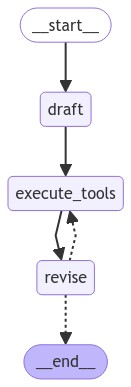

In [25]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [26]:
events = graph.stream(
    [HumanMessage(content=working_hypothesis_prompt)],
    stream_mode="values",
)
for i, step in enumerate(events):
    print(f"Step {i}")
    step[-1].pretty_print()

Step 0
================================ Human Message =================================

 
# Scientific Rationale for Gamma Secretase in Alzheimer's Disease


## Target Information 
### Develop a scientific rationale for the following:
                             
    **Given target:** Gamma secretase
    **Given disease:** Alzheimer's disease
    **Given mode of action:** Gamma secretase is a multi-subunit protease complex that cleaves type I transmembrane proteins, including the amyloid precursor protein (APP) leading to the generation of amyloid-beta (Aβ) peptides.

##Context:
Aβ is a family of secreted peptides generated from the sequential cleavages of the type 1 membrane protein APP by beta-secretase (BACE) and gamma-secretase (GSEC), respectively. 
BACE cleaves APP in the luminal domain, releasing the N-terminal soluble APPβ domain and leaving the C-terminal fragment, APP-CTF, which remains in the membrane. 
Subsequently, the APP-CTF is recruited to GSEC, a complex comprising f

Step 1
================================== Ai Message ==================================
Tool Calls:
  AnswerQuestion (call_IortpMne06mDNQJ9WDHmv9UB)
 Call ID: call_IortpMne06mDNQJ9WDHmv9UB
  Args:
    answer: ### Working Hypothesis
The working hypothesis is that targeting gamma secretase (GSEC) can effectively reduce the accumulation of amyloid-beta (Aβ) peptides, particularly the pathogenic forms such as Aβ42, which are known to aggregate and form amyloid plaques in the brains of individuals with Alzheimer's disease (AD). By inhibiting GSEC, we can potentially decrease the production of Aβ and mitigate the neurotoxic effects associated with its aggregation, thus slowing the progression of the disease.

### Unmet Medical Need
Currently, there is a significant unmet medical need for effective treatments for Alzheimer's disease. Existing therapies primarily focus on symptomatic relief rather than addressing the underlying pathology. With the increasing prevalence of AD and the aging popu

BadRequestError: Error code: 400 - {'error': {'message': "This model's maximum context length is 128000 tokens. However, your messages resulted in 152902 tokens (152748 in the messages, 154 in the functions). Please reduce the length of the messages or functions.", 'type': 'invalid_request_error', 'param': 'messages', 'code': 'context_length_exceeded'}}